In [4]:
from main import *

train_set: MNIST = load_mnist()
train_set: DataLoader = DataLoader(train_set, batch_size=20, shuffle=True)

test_set: MNIST = load_mnist(train=False)
test_set: DataLoader = DataLoader(test_set)

model = Model()
try:
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()
except IOError:
    time = timeit(lambda: train_model(model, train_set), number=1)
    print(f'train time = {time:.2f} s')
    torch.save(model.state_dict(), MODEL_PATH)

test_model(model, test_set)

train time = 16.04 s          
precision = 97.17%          
class samples distribution:
0: 9.80%
1: 11.35%
2: 10.32%
3: 10.10%
4: 9.82%
5: 8.92%
6: 9.58%
7: 10.28%
8: 9.74%
9: 10.09%


In [5]:
max_images = 10_000

images = [it[0] for i, it in enumerate(test_set) if i < max_images]
labels = [it[1] for i, it in enumerate(test_set) if i < max_images]

print(f'{len(images)=}')
print(f'{len(labels)=}')

print(f'{images[0].shape=}')
print(f'{labels[0].shape=}')

len(images)=10000
len(labels)=10000
images[0].shape=torch.Size([1, 1, 28, 28])
labels[0].shape=torch.Size([1])


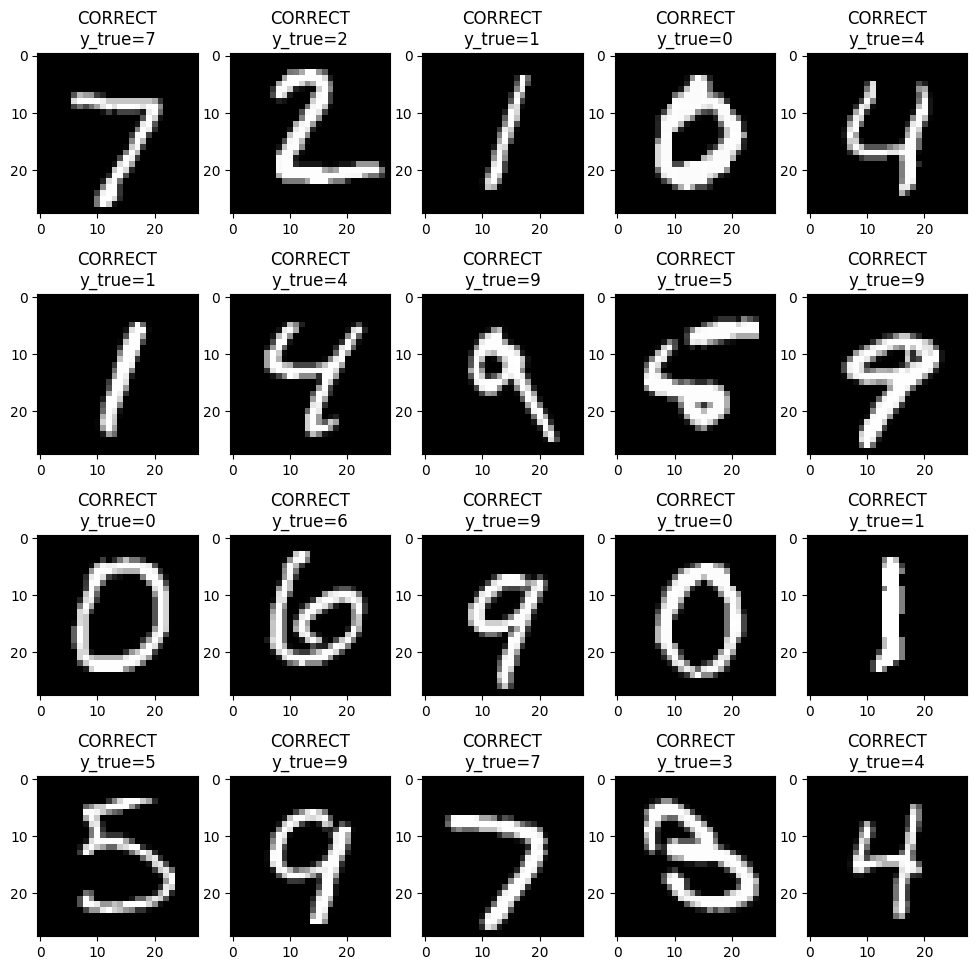

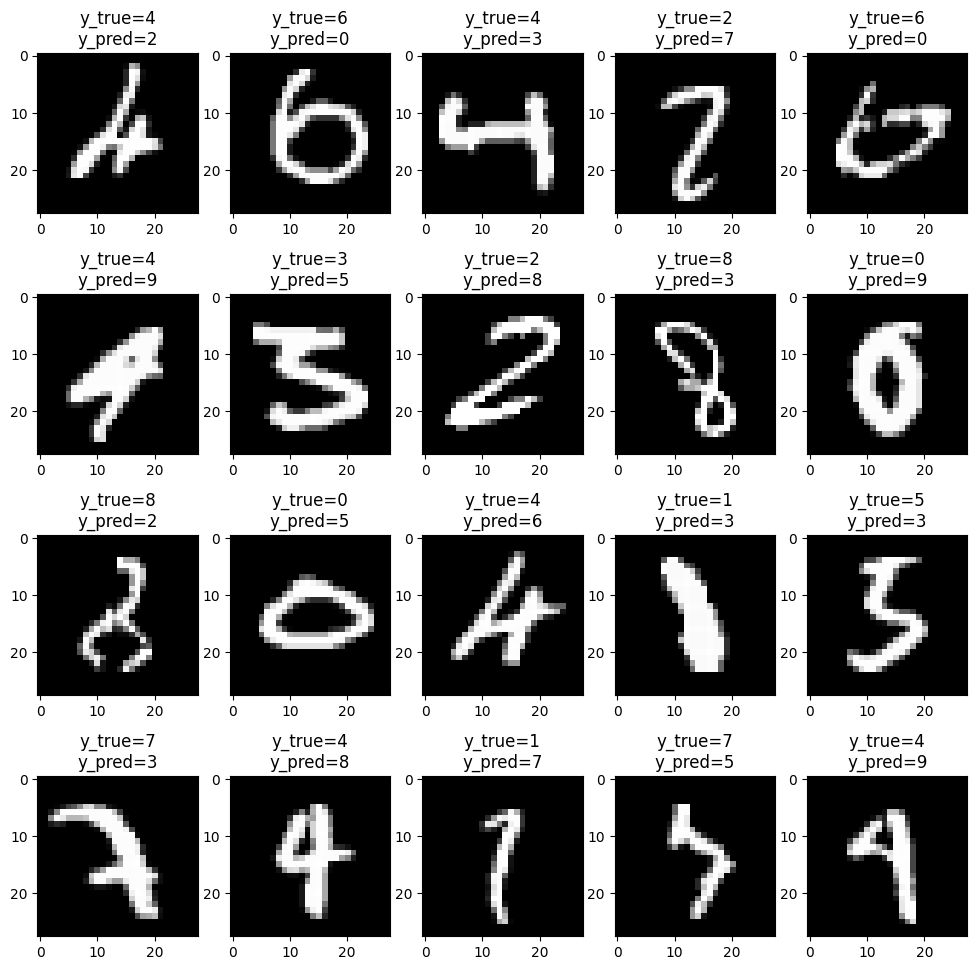

In [6]:
import math
from matplotlib import pyplot as plt


def plot_multiple_images(images_: list[tuple[Tensor, str]]) -> None:
    columns = 5
    rows = math.ceil(len(images_) / columns)

    fig = plt.figure(figsize=(columns + 7, rows * 3))
    ax: list[plt.Subplot] = []

    for i, (image, label) in enumerate(images_):
        ax.append(fig.add_subplot(rows, columns, i + 1))
        ax[-1].set_title(label)
        plt.imshow(image.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')


def demo(
        model_: Model,
        data: DataLoader,
        total: int,
) -> None:
    correct_total = total // 2
    incorrect_total = total // 2

    correct_examples: list[tuple[Tensor, int]] = []
    incorrect_examples: list[tuple[Tensor, int, int]] = []

    for image, y_true in data:
        y_true = y_true.item()
        y_pred = torch.argmax(model_(image), dim=1).item()

        if y_pred == y_true and len(correct_examples) < correct_total:
            correct_examples.append((image, y_true))
        if y_pred != y_true and len(incorrect_examples) < incorrect_total:
            incorrect_examples.append((image, y_true, y_pred))

        if len(correct_examples) >= correct_total and len(incorrect_examples) >= incorrect_total:
            break

    plot_multiple_images([(image, f'CORRECT\n{y_true=}') for image, y_true in correct_examples])
    plot_multiple_images([(image, f'{y_true=}\n{y_pred=}') for image, y_true, y_pred in incorrect_examples])

demo(model, test_set, total=40)
plt.show()